<a href="https://colab.research.google.com/github/teazaw/MAT421-Applied-Computational-Methods/blob/main/MAT421_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lagrange Polynomial Interpolation**
In numerical analysis, the **Lagrange interpolating polynomial** is a single polynomial that goes through all the data points. As an interpolation function, it has the property


 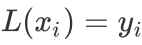

 for every point in the data set.

Lagrange polynomials can be written as a linear combination of Lagrange basis polynomials, as demonstrated by:


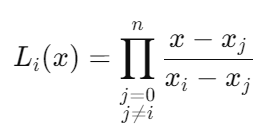

Thus, Lagrange polynomials represent a unique polynomial of degree at most *n* that fits the data. The following coding example uses the scipy library to compute the Lagrange polynomial.

Lagrange Interpolating Polynomial:        4         3         2
0.875 x - 10.42 x + 42.62 x - 69.08 x + 38


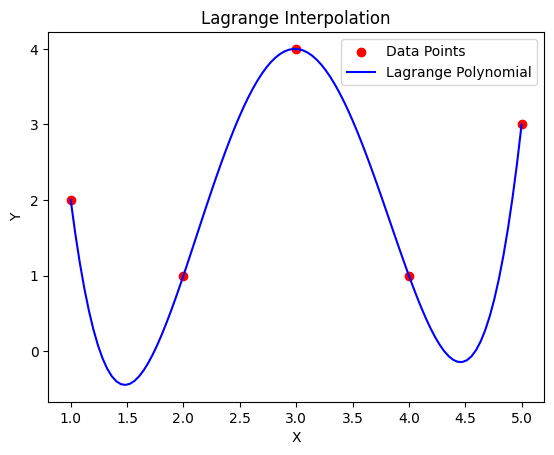

In [3]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

#compute the interpolation
def lagrange_interpolation(x_values, y_values):
    return lagrange(x_values, y_values)


x_vals = [1, 2, 3, 4, 5]
y_vals = [2, 1, 4, 1, 3]

polynomial = lagrange_interpolation(x_vals, y_vals)
print("Lagrange Interpolating Polynomial:", polynomial)

x_plot = np.linspace(min(x_vals), max(x_vals), 100)
y_plot = polynomial(x_plot)

plt.scatter(x_vals, y_vals, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Lagrange Polynomial', color='blue')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lagrange Interpolation')
plt.show()





# **Newton's Polynomial Interpolation**
**Newton's polynomial interpolation** is another popular way to fit exactly for a set of data points. The form of an *n*-1 order Newton's polynomial that goes through *n* points is:

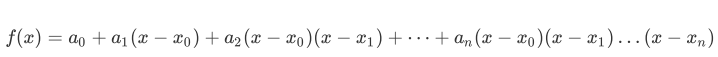

This can be re-written as:

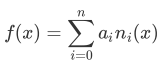

Thus, one of the benefits of Newton's polynomial interpolation is the fact that, once the coefficients are determined, adding new data points won't change the calculated ones. The following Python implementation computes Newton's interpolating polynomial using divided differences and plots the result.

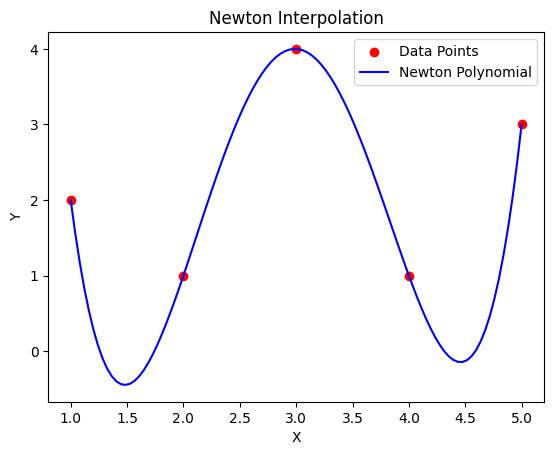

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def divided_differences(x_values, y_values):
    n = len(x_values)
    coef = np.zeros([n, n])
    coef[:, 0] = y_values

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_values[i+j] - x_values[i])

    return coef[0]  # first row is Newotn's coefficient

def newton_interpolation(x_values, y_values, x):
    coef = divided_differences(x_values, y_values)
    n = len(coef)

    result = coef[0]
    product_term = 1.0
    for i in range(1, n):
        product_term *= (x - x_values[i-1])
        result += coef[i] * product_term

    return result

# example data
x_vals = np.array([1, 2, 3, 4, 5])
y_vals = np.array([2, 1, 4, 1, 3])

x_plot = np.linspace(min(x_vals), max(x_vals), 100)
y_plot = [newton_interpolation(x_vals, y_vals, x) for x in x_plot]

plt.scatter(x_vals, y_vals, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Newton Polynomial', color='blue')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Newton Interpolation')
plt.show()
